# Competition  - Team 17



Brief Description of the Dataset: 
--------------------------------- 
    Each of the 19 activities is performed by eight subjects (4 female, 4 male, between the ages 20 and 30) for 5 minutes. 
    Total signal duration is 5 minutes for each activity of each subject. 
    The subjects are asked to perform the activities in their own style and were not restricted on how the activities should be performed. For this reason, there are inter-subject variations in the speeds and amplitudes of some activities. 
    The activities are performed at the Bilkent University Sports Hall, in the Electrical and Electronics Engineering Building, 
    and in a flat outdoor area on campus. Sensor units are calibrated to acquire data at 25 Hz sampling frequency. The 5-min signals are divided into 5-sec segments so that 480(=60x8) signal segments are obtained for each activity. 

    The 19 activities are: 
        sitting (A1), 
        standing (A2), 
        lying on back and on right side (A3 and A4), 
        ascending and descending stairs (A5 and A6), 
        standing in an elevator still (A7) 
        and moving around in an elevator (A8), 
        walking in a parking lot (A9), 
        walking on a treadmill with a speed of 4 km/h (in flat and 15 deg inclined positions) (A1 
        0 and A11), 
        running on a treadmill with a speed of 8 km/h (A12), 
        exercising on a stepper (A13), 
        exercising on a cross trainer (A14), 
        cycling on an exercise bike in horizontal and vertical positions (A15 and A16), 
        rowing (A17), 
        jumping (A18), 
        and playing basketball (A19). 

    File structure: 

        19 activities (a) (in the order given above) 
        8 subjects (p) 
        60 segments (s) 
        5 units on torso (T), right arm (RA), left arm (LA), right leg (RL), left leg (LL) 
        9 sensors on each unit (x,y,z accelerometers, x,y,z gyroscopes, x,y,z magnetometers) 

    Folders a01, a02, ..., a19 contain data recorded from the 19 activities. 

    For each activity, the subfolders p1, p2, ..., p8 contain data from each of the 8 subjects. 

    In each subfolder, there are 60 text files s01, s02, ..., s60, one for each segment. 

    In each text file, there are 5 units x 9 sensors = 45 columns and 5 sec x 25 Hz = 125 rows. 
    Each column contains the 125 samples of data acquired from one of the sensors of one of the units over a period of 5 sec. 
    Each row contains data acquired from all of the 45 sensor axes at a particular sampling instant separated by commas. 

    Columns 1-45 correspond to: 
    T_xacc, T_yacc, T_zacc, T_xgyro, ..., T_ymag, T_zmag, 
    RA_xacc, RA_yacc, RA_zacc, RA_xgyro, ..., RA_ymag, RA_zmag, 
    LA_xacc, LA_yacc, LA_zacc, LA_xgyro, ..., LA_ymag, LA_zmag, 
    RL_xacc, RL_yacc, RL_zacc, RL_xgyro, ..., RL_ymag, RL_zmag, 
    LL_xacc, LL_yacc, LL_zacc, LL_xgyro, ..., LL_ymag, LL_zmag. 

    Therefore, 
    columns 1-9 correspond to the sensors in unit 1 (T), 
    columns 10-18 correspond to the sensors in unit 2 (RA), 
    columns 19-27 correspond to the sensors in unit 3 (LA), 
    columns 28-36 correspond to the sensors in unit 4 (RL), 
    columns 37-45 correspond to the sensors in unit 5 (LL). 

    * accelerometers - an instrument for measuring the acceleration of a moving or vibrating body.
    * gyroscope      - a device consisting of a wheel or disc mounted so that it can spin rapidly about an axis which is itself free to alter in direction. The orientation of the axis is not affected by tilting of the mounting, so gyroscopes can be used to provide stability or maintain a reference direction in navigation systems, automatic pilots, and stabilizers
    * magnetometer   - an instrument used for measuring magnetic forces, especially the earth's magnetism

### Import packages

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing

## Data collection and data import

In [222]:
import glob

clist = ['T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro', 'T_ygyro', 'T_zgyro','T_xmag', 'T_ymag', 'T_zmag', 
         'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro','RA_xmag', 'RA_ymag', 'RA_zmag', 
         'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro','LA_xmag', 'LA_ymag', 'LA_zmag', 
         'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro','RL_xmag', 'RL_ymag', 'RL_zmag', 
         'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro','LL_xmag', 'LL_ymag', 'LL_zmag']


li = []
activity =['sitting','standing','lying on back side','lying on right side','Ascending stairs','Decending stairs','standing in an elevator','moving around in an elevator',
           'walking in a parking lot','walking (4 km/h) in flat',
           'walking (4 km/h) in 15 deg inclined','running (8 km/hr)',
           'exercising on a stepper','exercising on a cross trainer','cycling in horizontal position',
           'cycling in vertical position','rowing','jumping','playing basketball']
for a in range(1,20):
    path = '/Users/bilalaliyar/Study/Python/Activity/Competition/data/a'+str(a).rjust(2,'0')
    print(path)
    for i in range(1,9):
        path = path+'/p'+str(i) 
        #The dataset is huge and the processing is taking long time so picking only 10 files out of 60 files from each folder
        all_files = glob.glob(path + "/s0*.txt")

        for filename in all_files:
            #print(filename)
            df = pd.read_csv(filename, index_col=None, header=None)
            df.columns=clist
            df['Activity'] = activity[a-1]
            li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)
data1 = data


/Users/bilalaliyar/Study/Python/Activity/Competition/data/a01
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a02
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a03
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a04
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a05
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a06
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a07
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a08
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a09
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a10
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a11
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a12
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a13
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a14
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a15
/Users/bilalaliyar/Study/Python/Activity/Competition/data/a16
/Users/b

    The dataset is huge and the processing is taking long time, so picking only 10 files out of 60 files from each folder. A new feature "Activity'is added based on the foldewr from which the file is imported

In [223]:
data.tail()

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag,Activity
21370,11.6910,2.280200,3.40460,0.54561,-0.34564,-0.032147,-0.68041,0.25297,-0.71908,-2.28360,...,-12.3830,4.47770,-3.7328,-1.5001,-0.014601,1.3772,0.86483,0.65549,-0.301780,playing basketball
21371,10.7870,0.507880,3.84880,-0.23407,-0.83166,0.032592,-0.70345,0.24977,-0.69547,-1.71810,...,-9.4873,0.55608,-7.6313,-1.9116,0.797060,1.3797,0.90222,0.62589,-0.249170,playing basketball
21372,8.8608,0.002294,4.47990,-0.25091,0.54573,0.095782,-0.69943,0.25659,-0.69404,0.38498,...,-12.7180,-3.35230,-2.8407,-2.4103,0.911030,2.0192,0.94425,0.58930,-0.166890,playing basketball
21373,6.1174,-0.926100,3.17740,-0.72374,-0.53450,0.190610,-0.70069,0.28015,-0.68208,-0.90912,...,-7.6523,-1.15100,-4.6765,-2.3370,0.480880,2.1585,0.98821,0.52090,-0.094499,playing basketball
21374,4.3367,-0.421320,0.91422,-0.67112,-0.34888,0.023630,-0.70979,0.29929,-0.66377,-1.31210,...,-9.3326,-1.65910,1.8975,-1.3032,0.139180,2.2612,1.03200,0.43648,-0.045283,playing basketball


In [224]:
data.shape

(21375, 46)

    There are 21375 samples and 46 features in the dataset

In [225]:
data.describe()

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
count,21375.000000,21375.000000,21375.000000,21375.000000,21375.000000,21375.000000,21373.000000,21375.000000,21375.000000,21375.000000,...,21375.000000,21375.000000,21375.000000,21375.000000,21375.000000,21375.000000,21375.000000,21375.000000,21375.000000,21375.000000
mean,7.679890,-0.166386,3.829459,-0.002925,0.015293,-0.001185,-0.558386,0.002987,-0.432843,2.997455,...,0.002566,-7.364846,-3.281515,0.349713,-0.023332,0.020575,-0.009382,0.426682,0.382825,-0.026775
std,5.074295,2.236763,2.594654,0.653218,0.795763,0.259519,0.287511,0.311784,0.332283,4.878977,...,0.316136,5.731115,6.101856,2.813584,0.780740,0.416585,1.175867,0.294556,0.285294,0.321942
min,-16.400000,-13.421000,-10.050000,-9.310300,-13.138000,-2.397700,-1.010900,-0.675680,-1.013900,-28.551000,...,-0.798980,-69.560000,-70.080000,-23.182000,-5.430700,-4.623400,-4.228000,-0.626080,-0.571560,-0.649780
25%,7.004800,-0.578005,2.398550,-0.151730,-0.118035,-0.081462,-0.780370,-0.214650,-0.719775,-0.608525,...,-0.244045,-9.913450,-8.291050,-0.879235,-0.316070,-0.090951,-0.431725,0.275950,0.210850,-0.347035
50%,8.428400,0.153440,3.726900,0.000000,0.014824,-0.001977,-0.624550,-0.070285,-0.515340,3.259800,...,0.000000,-8.860600,-2.484900,-0.062472,-0.002865,0.001509,-0.000506,0.459240,0.403690,-0.006321
75%,9.373050,1.122650,5.268650,0.157275,0.173355,0.080586,-0.448640,0.287780,-0.121235,7.319650,...,0.277600,-2.795700,0.157610,1.047450,0.206130,0.124030,0.557385,0.631880,0.569050,0.154890
max,51.189000,15.401000,24.103000,7.229700,11.088000,4.489300,0.734490,0.651580,0.785120,66.550000,...,0.575180,9.091100,53.635000,19.997000,7.485100,5.575200,5.794600,1.111900,1.022100,0.721510


In [226]:
data['Activity']. value_counts()

walking in a parking lot               1125
exercising on a stepper                1125
lying on right side                    1125
playing basketball                     1125
Decending stairs                       1125
running (8 km/hr)                      1125
cycling in horizontal position         1125
lying on back side                     1125
rowing                                 1125
moving around in an elevator           1125
walking (4 km/h) in 15 deg inclined    1125
standing in an elevator                1125
cycling in vertical position           1125
Ascending stairs                       1125
exercising on a cross trainer          1125
walking (4 km/h) in flat               1125
standing                               1125
jumping                                1125
sitting                                1125
Name: Activity, dtype: int64

In [227]:
data.isnull().sum()

T_xacc      0
T_yacc      0
T_zacc      0
T_xgyro     0
T_ygyro     0
T_zgyro     0
T_xmag      2
T_ymag      0
T_zmag      0
RA_xacc     0
RA_yacc     0
RA_zacc     0
RA_xgyro    0
RA_ygyro    1
RA_zgyro    0
RA_xmag     0
RA_ymag     0
RA_zmag     0
LA_xacc     0
LA_yacc     0
LA_zacc     0
LA_xgyro    0
LA_ygyro    0
LA_zgyro    0
LA_xmag     0
LA_ymag     0
LA_zmag     0
RL_xacc     0
RL_yacc     0
RL_zacc     0
RL_xgyro    0
RL_ygyro    0
RL_zgyro    0
RL_xmag     0
RL_ymag     0
RL_zmag     0
LL_xacc     0
LL_yacc     0
LL_zacc     0
LL_xgyro    0
LL_ygyro    0
LL_zgyro    0
LL_xmag     0
LL_ymag     0
LL_zmag     0
Activity    0
dtype: int64

## Data preprocessing

array([[<AxesSubplot:title={'center':'T_xacc'}>,
        <AxesSubplot:title={'center':'T_yacc'}>,
        <AxesSubplot:title={'center':'T_zacc'}>,
        <AxesSubplot:title={'center':'T_xgyro'}>,
        <AxesSubplot:title={'center':'T_ygyro'}>,
        <AxesSubplot:title={'center':'T_zgyro'}>,
        <AxesSubplot:title={'center':'T_xmag'}>],
       [<AxesSubplot:title={'center':'T_ymag'}>,
        <AxesSubplot:title={'center':'T_zmag'}>,
        <AxesSubplot:title={'center':'RA_xacc'}>,
        <AxesSubplot:title={'center':'RA_yacc'}>,
        <AxesSubplot:title={'center':'RA_zacc'}>,
        <AxesSubplot:title={'center':'RA_xgyro'}>,
        <AxesSubplot:title={'center':'RA_ygyro'}>],
       [<AxesSubplot:title={'center':'RA_zgyro'}>,
        <AxesSubplot:title={'center':'RA_xmag'}>,
        <AxesSubplot:title={'center':'RA_ymag'}>,
        <AxesSubplot:title={'center':'RA_zmag'}>,
        <AxesSubplot:title={'center':'LA_xacc'}>,
        <AxesSubplot:title={'center':'LA_yacc'}>,
 

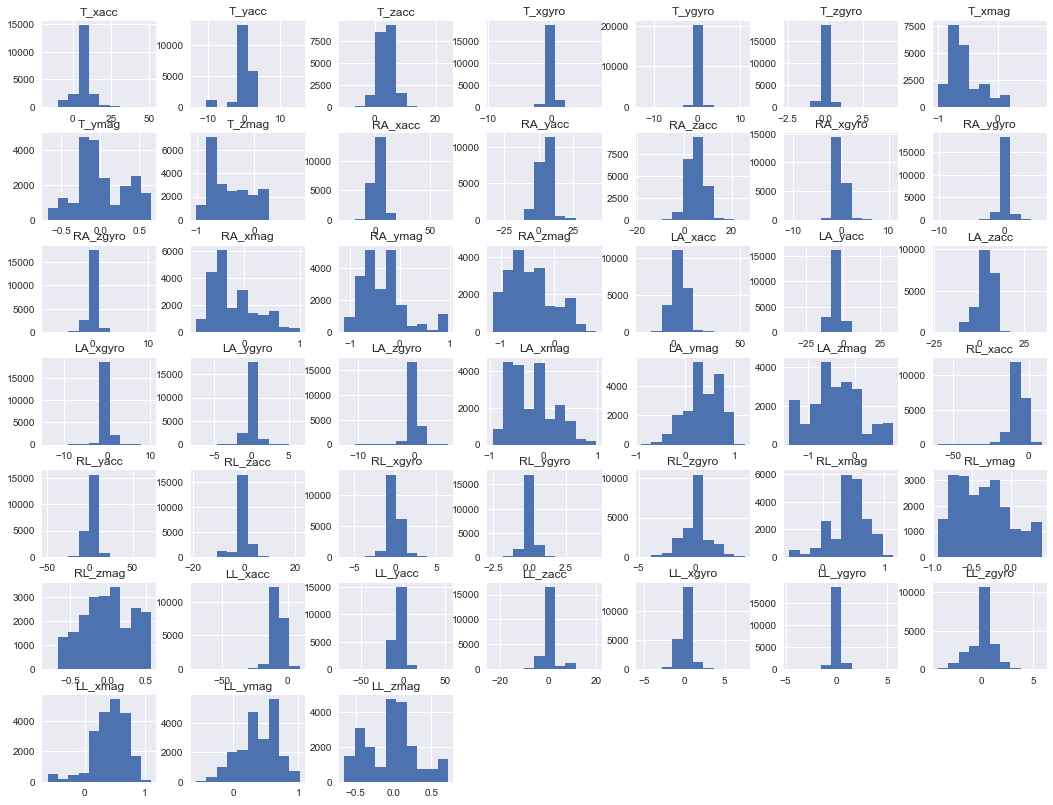

In [228]:
data.hist(figsize=(18, 14))

### Handling missing values in the dataset

In [229]:
data.isnull().sum()

T_xacc      0
T_yacc      0
T_zacc      0
T_xgyro     0
T_ygyro     0
T_zgyro     0
T_xmag      2
T_ymag      0
T_zmag      0
RA_xacc     0
RA_yacc     0
RA_zacc     0
RA_xgyro    0
RA_ygyro    1
RA_zgyro    0
RA_xmag     0
RA_ymag     0
RA_zmag     0
LA_xacc     0
LA_yacc     0
LA_zacc     0
LA_xgyro    0
LA_ygyro    0
LA_zgyro    0
LA_xmag     0
LA_ymag     0
LA_zmag     0
RL_xacc     0
RL_yacc     0
RL_zacc     0
RL_xgyro    0
RL_ygyro    0
RL_zgyro    0
RL_xmag     0
RL_ymag     0
RL_zmag     0
LL_xacc     0
LL_yacc     0
LL_zacc     0
LL_xgyro    0
LL_ygyro    0
LL_zgyro    0
LL_xmag     0
LL_ymag     0
LL_zmag     0
Activity    0
dtype: int64

    There are null values in the dataset for T_xmag and RA_ygyro features these need to be filled with median/mean values based on the distribution

In [230]:
data['T_xmag'] = data['T_xmag'].fillna(data['T_xmag'].median())
data['RA_ygyro'] = data['RA_ygyro'].fillna(data['RA_ygyro'].mean())

### Outliner detection and handling

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(1, 0, 'T_xacc'),
  Text(2, 0, 'T_yacc'),
  Text(3, 0, 'T_zacc'),
  Text(4, 0, 'T_xgyro'),
  Text(5, 0, 'T_ygyro'),
  Text(6, 0, 'T_zgyro'),
  Text(7, 0, 'T_xmag'),
  Text(8, 0, 'T_ymag'),
  Text(9, 0, 'T_zmag'),
  Text(10, 0, 'RA_xacc'),
  Text(11, 0, 'RA_yacc'),
  Text(12, 0, 'RA_zacc'),
  Text(13, 0, 'RA_xgyro'),
  Text(14, 0, 'RA_ygyro'),
  Text(15, 0, 'RA_zgyro'),
  Text(16, 0, 'RA_xmag'),
  Text(17, 0, 'RA_ymag'),
  Text(18, 0, 'RA_zmag'),
  Text(19, 0, 'LA_xacc'),
  Text(20, 0, 'LA_yacc'),
  Text(21, 0, 'LA_zacc'),
  Text(22, 0, 'LA_xgyro'),
  Text(23, 0, 'LA_ygyro'),
  Text(24, 0, 'LA_zgyro'),
  Text(25, 0, 'LA_xmag'),
  Text(26, 0, 'LA_ymag'),
  Text(27, 0, 'LA_zmag'),
  Text(28, 0, 'RL_xacc'),
  Text(29, 0, 'RL_yacc'),
  Text(30, 0, 'RL_zacc'),
  Text(31, 0, 'RL_xgyro

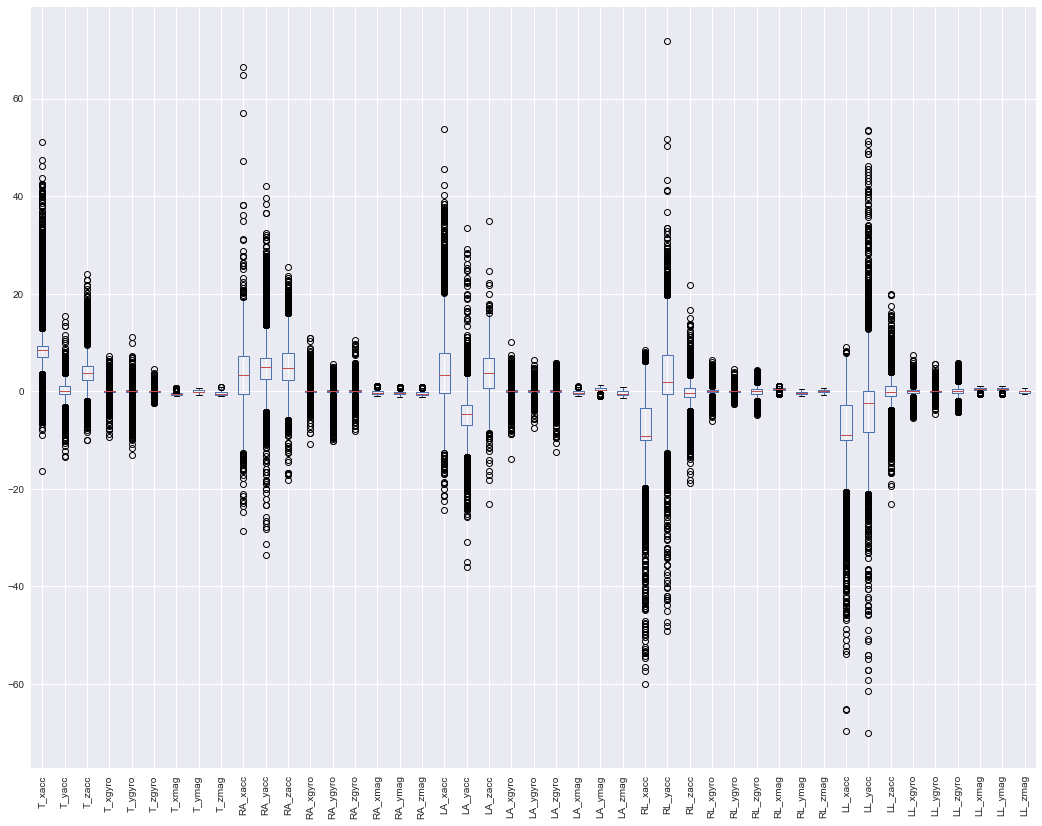

In [231]:
plt.figure(figsize=(18, 14))
data.boxplot()
plt.xticks(rotation=90) 

    Outliners are there in many faetures and this need to be removed

Text(0.5, 1.0, 'Box plot of T_xacc')

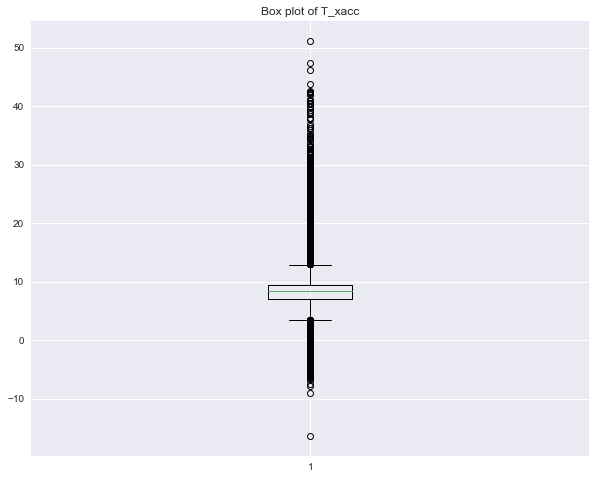

In [232]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['T_xacc'])
plt.title('Box plot of T_xacc')

##### Removing Outliners from T_xacc feature

In [233]:
#Finding the percentiles and interquadrilerange (IQR)

In [234]:
Q1 = np.percentile(data['T_xacc'],25,interpolation='midpoint')
Q2 = np.percentile(data['T_xacc'],50,interpolation='midpoint')
Q3 = np.percentile(data['T_xacc'],75,interpolation='midpoint')
print('Q1-',Q1)
print('Q2-',Q2)
print('Q3-',Q3)
#find the interquartile range IQR
IQR = Q3 - Q1
print('IQR-',IQR)
low_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('low_limit-',low_limit)
print('upper_limit-',upper_limit)
# Finding the outliners based on the upper an lower limit
out = pd.DataFrame()
out['outlier'] = data[(data['T_xacc']<low_limit) | (data['T_xacc']>upper_limit)]['T_xacc']


Q1- 7.0047999999999995
Q2- 8.4284
Q3- 9.37305
IQR- 2.3682499999999997
low_limit- 3.452425
upper_limit- 12.925424999999999


In [235]:
out

,outlier
2250,-4.77850
2251,-4.74890
2252,-4.77870
2253,-4.82330
2254,-4.74890
...,...
21322,16.42300
21326,-0.64455
21327,1.14880
21328,2.55570


In [236]:
# Removing the ouliners
ind1= (data['T_xacc']<low_limit) | (data['T_xacc']>upper_limit)
#ind = data.loc((data['Fare']<low_limit) | (data['Fare']>upper_limit)).index

data.drop(data.loc[ind1].index,inplace=True)

In [237]:
data.shape

(16557, 46)

Text(0.5, 1.0, 'Box plot of T_xacc')

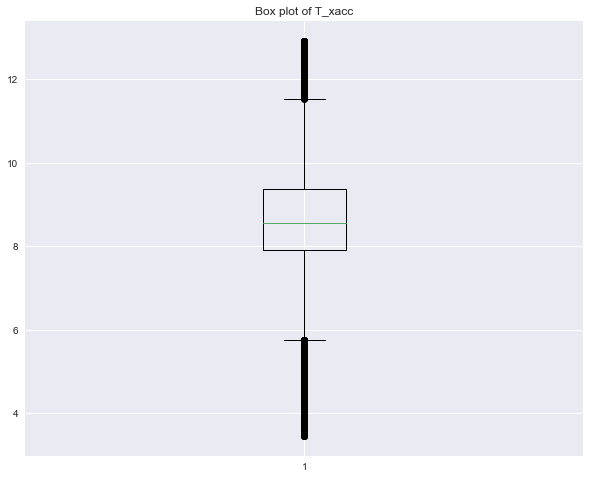

In [238]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['T_xacc'])
plt.title('Box plot of T_xacc')

##### Removing Outliners from RL_xacc feature

Text(0.5, 1.0, 'Box plot of RL_xacc')

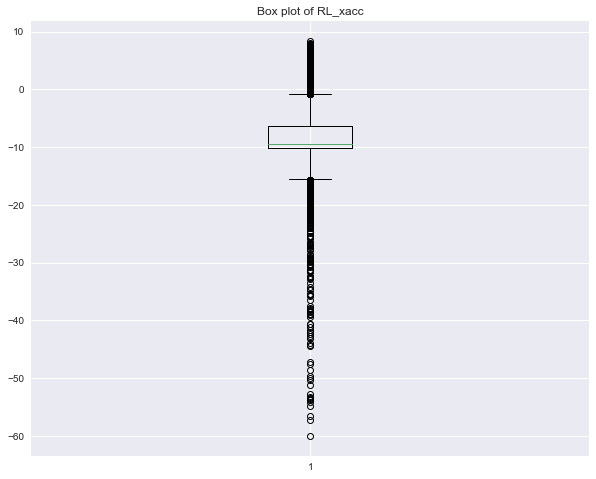

In [239]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['RL_xacc'])
plt.title('Box plot of RL_xacc')

In [240]:
#Finding the percentiles and interquadrilerange (IQR)
Q1 = np.percentile(data['RL_xacc'],25,interpolation='midpoint')
Q2 = np.percentile(data['RL_xacc'],50,interpolation='midpoint')
Q3 = np.percentile(data['RL_xacc'],75,interpolation='midpoint')
print('Q1-',Q1)
print('Q2-',Q2)
print('Q3-',Q3)
#find the interquartile range IQR
IQR = Q3 - Q1
print('IQR-',IQR)
low_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('low_limit-',low_limit)
print('upper_limit-',upper_limit)
# Finding the outliners based on the upper an lower limit
out = pd.DataFrame()
out['outlier'] = data[(data['RL_xacc']<low_limit) | (data['RL_xacc']>upper_limit)]['RL_xacc']

out

Q1- -10.078
Q2- -9.5115
Q3- -6.3849
IQR- 3.6930999999999994
low_limit- -15.617649999999998
upper_limit- -0.845250000000001


,outlier
4537,-19.89100
4768,-21.08300
4807,-21.58800
5271,-16.87100
5318,-21.98800
...,...
21263,-17.14200
21320,-16.51100
21325,0.47983
21369,-16.63700


Text(0.5, 1.0, 'Box plot of RL_xacc')

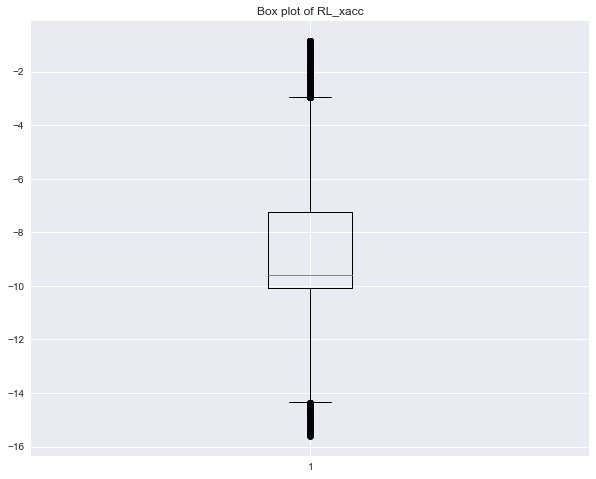

In [241]:
# Removing the ouliners
ind1= (data['RL_xacc']<low_limit) | (data['RL_xacc']>upper_limit)

data.drop(data.loc[ind1].index,inplace=True)
data.shape
plt.figure(figsize=(10, 8))
plt.boxplot(data['RL_xacc'])
plt.title('Box plot of RL_xacc')

##### Removing Outliners from T_yacc feature

Text(0.5, 1.0, 'Box plot of T_yacc')

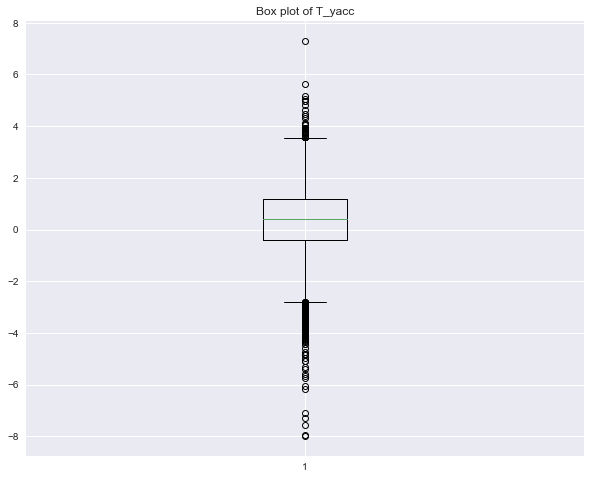

In [242]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['T_yacc'])
plt.title('Box plot of T_yacc')

In [243]:
#Finding the percentiles and interquadrilerange (IQR)
Q1 = np.percentile(data['T_yacc'],25,interpolation='midpoint')
Q2 = np.percentile(data['T_yacc'],50,interpolation='midpoint')
Q3 = np.percentile(data['T_yacc'],75,interpolation='midpoint')
print('Q1-',Q1)
print('Q2-',Q2)
print('Q3-',Q3)
#find the interquartile range IQR
IQR = Q3 - Q1
print('IQR-',IQR)
low_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('low_limit-',low_limit)
print('upper_limit-',upper_limit)
# Finding the outliners based on the upper an lower limit
out = pd.DataFrame()
out['outlier'] = data[(data['T_yacc']<low_limit) | (data['T_yacc']>upper_limit)]['T_yacc']
# Removing the ouliners
ind1= (data['T_yacc']<low_limit) | (data['T_yacc']>upper_limit)

data.drop(data.loc[ind1].index,inplace=True)


Q1- -0.42154499999999995
Q2- 0.408325
Q3- 1.1679
IQR- 1.589445
low_limit- -2.8057125000000003
upper_limit- 3.5520675


Text(0.5, 1.0, 'Box plot of T_yacc')

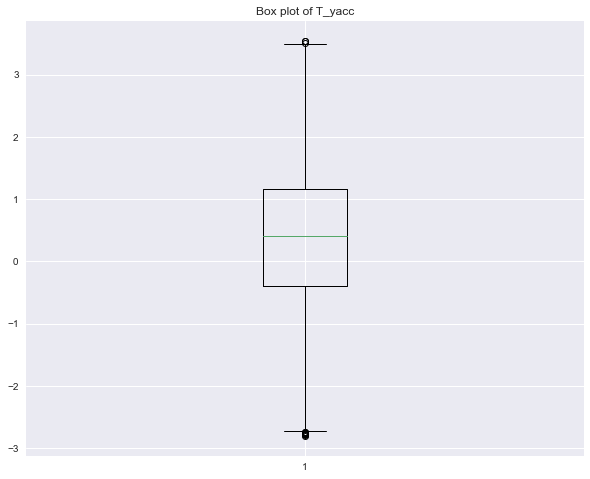

In [244]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['T_yacc'])
plt.title('Box plot of T_yacc')

##### Removing Outliners from RA_xacc feature

Text(0.5, 1.0, 'Box plot of RA_xacc')

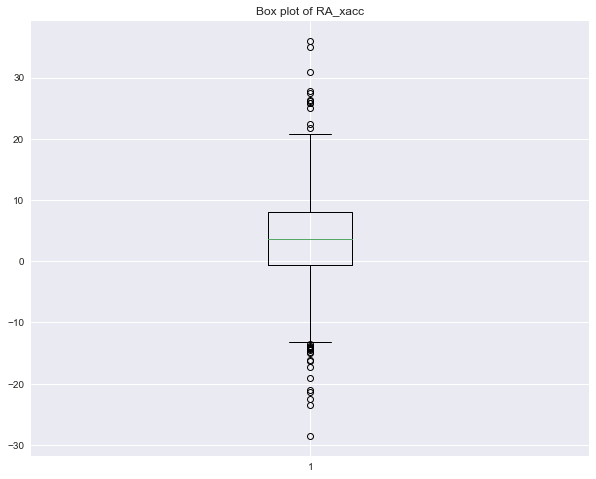

In [245]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['RA_xacc'])
plt.title('Box plot of RA_xacc')

In [246]:
#Finding the percentiles and interquadrilerange (IQR)
Q1 = np.percentile(data['RA_xacc'],25,interpolation='midpoint')
Q2 = np.percentile(data['RA_xacc'],50,interpolation='midpoint')
Q3 = np.percentile(data['RA_xacc'],75,interpolation='midpoint')
print('Q1-',Q1)
print('Q2-',Q2)
print('Q3-',Q3)
#find the interquartile range IQR
IQR = Q3 - Q1
print('IQR-',IQR)
low_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('low_limit-',low_limit)
print('upper_limit-',upper_limit)
# Finding the outliners based on the upper an lower limit
out = pd.DataFrame()
out['outlier'] = data[(data['RA_xacc']<low_limit) | (data['RA_xacc']>upper_limit)]['RA_xacc']

# Removing the ouliners
ind1= (data['RA_xacc']<low_limit) | (data['RA_xacc']>upper_limit)

data.drop(data.loc[ind1].index,inplace=True)


Q1- -0.54234
Q2- 3.63715
Q3- 8.0947
IQR- 8.637039999999999
low_limit- -13.497899999999998
upper_limit- 21.050259999999998


Text(0.5, 1.0, 'Box plot of RA_xacc')

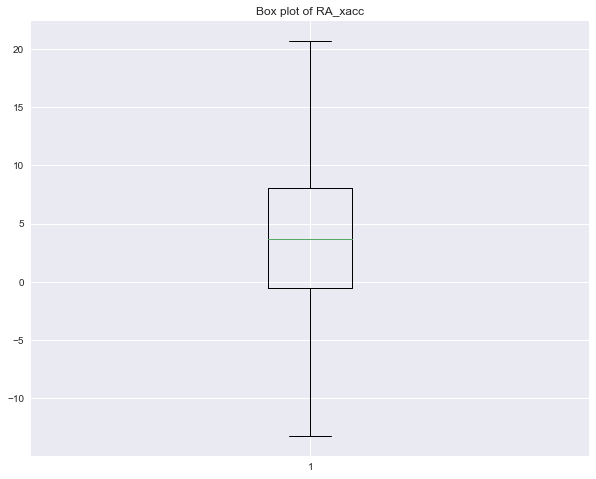

In [247]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['RA_xacc'])
plt.title('Box plot of RA_xacc')

##### Removing Outliners from LL_yacc feature

Text(0.5, 1.0, 'Box plot of LL_yacc')

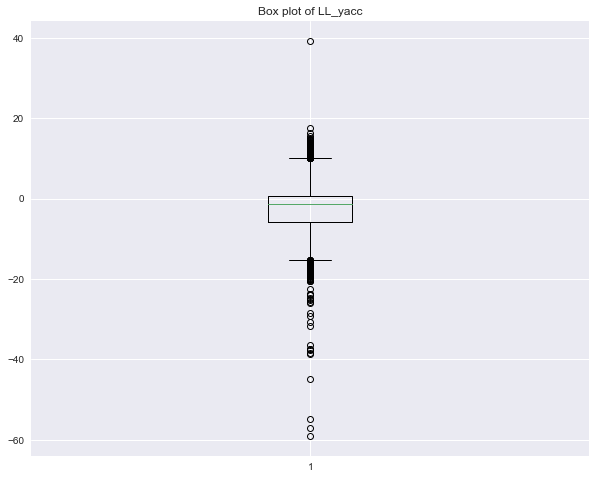

In [248]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['LL_yacc'])
plt.title('Box plot of LL_yacc')

In [249]:
#Finding the percentiles and interquadrilerange (IQR)
Q1 = np.percentile(data['LL_yacc'],25,interpolation='midpoint')
Q2 = np.percentile(data['LL_yacc'],50,interpolation='midpoint')
Q3 = np.percentile(data['LL_yacc'],75,interpolation='midpoint')
print('Q1-',Q1)
print('Q2-',Q2)
print('Q3-',Q3)
#find the interquartile range IQR
IQR = Q3 - Q1
print('IQR-',IQR)
low_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('low_limit-',low_limit)
print('upper_limit-',upper_limit)
# Finding the outliners based on the upper an lower limit
out = pd.DataFrame()
out['outlier'] = data[(data['LL_yacc']<low_limit) | (data['LL_yacc']>upper_limit)]['LL_yacc']

# Removing the ouliners
ind1= (data['LL_yacc']<low_limit) | (data['LL_yacc']>upper_limit)

data.drop(data.loc[ind1].index,inplace=True)

Q1- -5.7238
Q2- -1.44815
Q3- 0.59145
IQR- 6.31525
low_limit- -15.196674999999999
upper_limit- 10.064325


Text(0.5, 1.0, 'Box plot of LL_yacc')

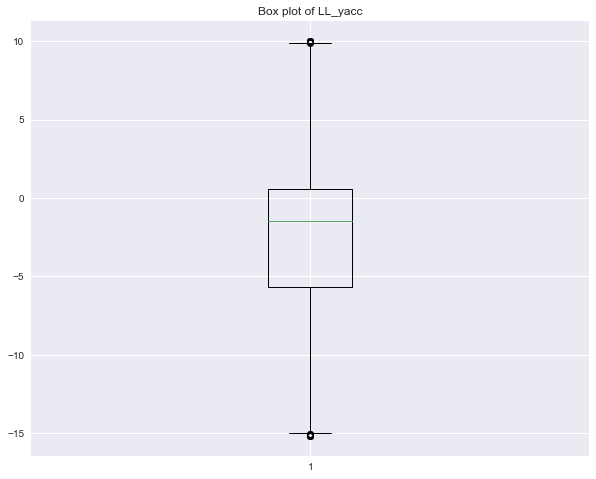

In [250]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['LL_yacc'])
plt.title('Box plot of LL_yacc')

In [251]:
from sklearn.linear_model import LogisticRegression

In [252]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, precision_score

In [253]:
y = data["Activity"]
X = data.drop(["Activity"], axis=1)
X

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
0,8.0411,1.153000,5.51410,-0.024100,-0.002951,0.007333,-0.78981,-0.072298,0.14805,0.61037,...,-0.040150,-2.8548,-9.0633,2.6393,-0.004407,-0.000894,-0.000569,0.74138,0.30115,-0.056264
1,8.1009,1.138200,5.39510,-0.002307,-0.005099,-0.007220,-0.78982,-0.071518,0.14791,0.62262,...,-0.038971,-2.8697,-9.0633,2.6615,-0.008110,-0.005275,0.004845,0.74128,0.30287,-0.057228
2,8.0859,1.115900,5.43210,0.001318,0.000328,-0.001767,-0.79104,-0.072855,0.15002,0.59345,...,-0.040378,-2.8098,-9.0635,2.6326,-0.014279,0.007983,-0.002314,0.74225,0.30325,-0.054814
3,8.0710,1.138200,5.45450,0.001293,-0.006885,-0.005384,-0.79078,-0.070271,0.15001,0.57373,...,-0.038743,-2.7949,-9.0935,2.6328,-0.018723,0.006059,-0.007749,0.74230,0.30325,-0.054149
4,8.0708,1.123100,5.51410,-0.021358,0.000598,0.005500,-0.79211,-0.072200,0.15011,0.54932,...,-0.038747,-2.7874,-9.0935,2.6180,0.007612,0.009518,-0.018648,0.73976,0.30298,-0.056217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21368,11.3310,-1.818300,2.78590,0.761500,0.657590,0.069422,-0.70773,0.312230,-0.67185,-3.89660,...,0.206540,-14.1090,-4.8340,1.8979,-0.265900,2.590400,0.567860,0.80770,0.71509,-0.337120
21370,11.6910,2.280200,3.40460,0.545610,-0.345640,-0.032147,-0.68041,0.252970,-0.71908,-2.28360,...,0.235370,-12.3830,4.4777,-3.7328,-1.500100,-0.014601,1.377200,0.86483,0.65549,-0.301780
21372,8.8608,0.002294,4.47990,-0.250910,0.545730,0.095782,-0.69943,0.256590,-0.69404,0.38498,...,0.216050,-12.7180,-3.3523,-2.8407,-2.410300,0.911030,2.019200,0.94425,0.58930,-0.166890
21373,6.1174,-0.926100,3.17740,-0.723740,-0.534500,0.190610,-0.70069,0.280150,-0.68208,-0.90912,...,0.152690,-7.6523,-1.1510,-4.6765,-2.337000,0.480880,2.158500,0.98821,0.52090,-0.094499


In [254]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LogisticRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

/Users/bilalaliyar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [255]:
print(confusion_matrix(y_test, predictions))

[[211   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  0 187   0   0   0   0   0   1   0   0   0   0   3   0   0   0   0]
 [  0   0 181   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 223   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 268   1   0   0   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 233   0   0   9   0   0   0   1   0   0   0   1]
 [  0   0   0   0   0   0  31   2   0   0   0   0   0   1   0   0   0]
 [  1   0   0   0   2   0   0 253   0   0   1   0   2   1   0   0   0]
 [  0   0   0   1   4  10   0   3 218   0   1   0   1   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0 175   0   0   0   0   0   0   0]
 [  0   0   1   0   0   3   0   0   2   0  41   0   1   0   4   2   0]
 [  0   0   0   0   0   0   0   0   0   0   0 290   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 276   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 278   0   0   0]
 [  0 

In [256]:
print(classification_report(y_test, predictions))

                                     precision    recall  f1-score   support

                   Ascending stairs       1.00      0.99      0.99       213
                   Decending stairs       1.00      0.98      0.99       191
     cycling in horizontal position       0.99      1.00      1.00       181
       cycling in vertical position       1.00      1.00      1.00       223
      exercising on a cross trainer       0.98      0.99      0.98       271
            exercising on a stepper       0.94      0.95      0.95       244
                            jumping       1.00      0.91      0.95        34
       moving around in an elevator       0.97      0.97      0.97       260
                 playing basketball       0.94      0.91      0.93       239
                             rowing       1.00      1.00      1.00       175
                  running (8 km/hr)       0.95      0.76      0.85        54
                            sitting       1.00      1.00      1.00       29

### Feature selection/Reduction

##### Checking the correlation between fatures

In [257]:
corrMartix = data[['RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro','RL_xmag', 'RL_ymag', 'RL_zmag', 
         'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro','LL_xmag', 'LL_ymag', 'LL_zmag']].corr()

<AxesSubplot:>

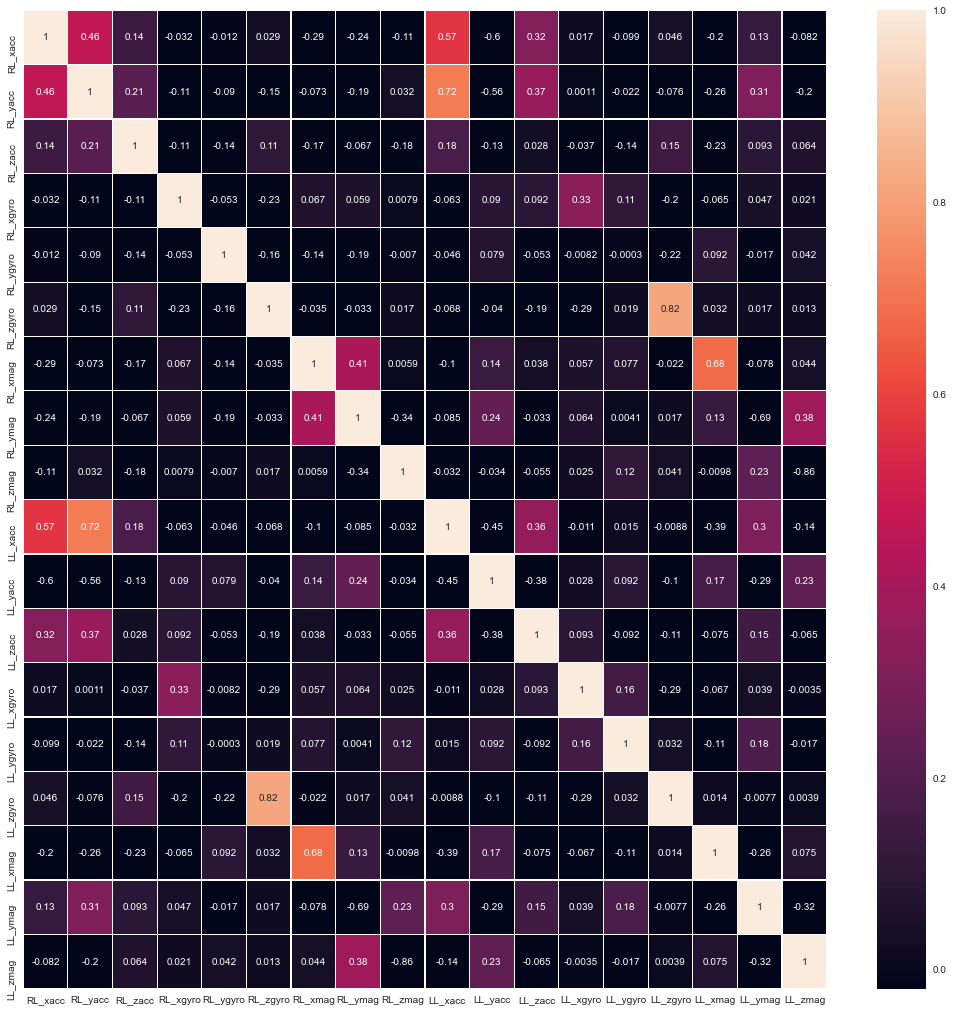

In [258]:
plt.subplots(figsize=(18, 18))
sns.heatmap(corrMartix,vmin=-.02,vmax=1,annot=True,linewidth=0.2)

<AxesSubplot:>

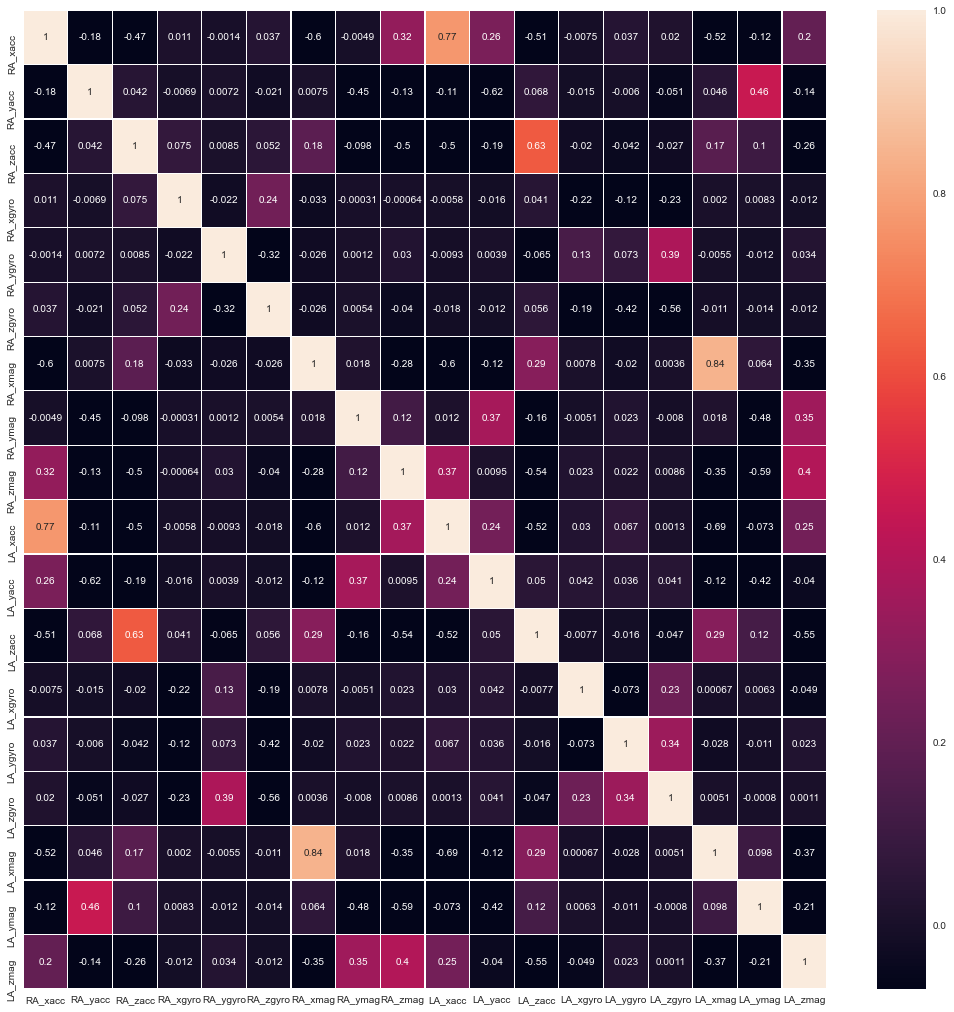

In [259]:
corrMartix = data[['RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro','RA_xmag', 'RA_ymag', 'RA_zmag', 
         'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro','LA_xmag', 'LA_ymag', 'LA_zmag']].corr()
plt.subplots(figsize=(18, 18))
sns.heatmap(corrMartix,vmin=-.07,vmax=1,annot=True,linewidth=0.2)

#### Dropping few features based on their correlation between them

In [260]:
y = data["Activity"]

#X = data.drop(['Activity','LL_xacc','LL_zgyro','LL_xmag','LL_ymag'], axis=1)
data = data.drop(['LA_xacc','LA_xmag','RA_ymag','LA_yacc','RA_zmag','LA_zacc','LA_zmag',
              'LL_xacc','LL_zgyro','LL_xmag','LL_ymag'], axis=1)
X = data.drop(['Activity'], axis=1)

In [261]:
#X.drop(X.columns[[35,7,34,17,8,32,36,27,6,16,38]], axis=1)

In [262]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LogisticRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

/Users/bilalaliyar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [263]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[206   0   0   0   0   0   0   5   0   0   0   0   0   1   0   0   1]
 [  0 185   0   0   0   0   0   1   0   0   0   0   5   0   0   0   0]
 [  0   0 180   0   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 223   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 266   0   0   0   2   0   2   0   0   0   0   0   1]
 [  0   0   0   0   0 225   0   0  19   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0  29   2   0   0   0   0   0   0   0   0   0]
 [  2   0   0   3   7   0   0 242   2   0   2   0   0   2   0   0   0]
 [  1   1   0   0   3  14   0   1 211   1   2   0   0   1   3   0   1]
 [  0   0   0   0   0   0   0   0   0 175   0   0   0   0   0   0   0]
 [  1   0   1   2   3   3   0   0   2   0  33   2   0   0   6   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0 290   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 276   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 278   0   0   0]
 [  0 

### Standardization/Normalization

#### Applying minMax scaling

In [264]:
#minMaxScaler = preprocessing.StandardScaler()
minMaxScaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = minMaxScaler.fit_transform(X)
X = pd.DataFrame(X)
X.describe()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LogisticRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[213   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 191   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 181   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 223   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 270   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 233   0   0  11   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  34   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 258   0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   2  22   0   0 213   0   0   0   0   0   0   0   2]
 [  0   0   0   0   0   0   0   0   0 175   0   0   0   0   0   0   0]
 [  1   0   0   0   2   0   0   0   0   0  31   0   0   0  20   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 290   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 276   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 278   0   0   0]
 [  0 

/Users/bilalaliyar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Encoding

#### Doing Label encoding for Activity Feature

In [265]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
y = le.fit_transform(data["Activity"])

In [266]:
#y = data["Activity"]
X = data.drop(['Activity'], axis=1)

minMaxScaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = minMaxScaler.fit_transform(X)
X = pd.DataFrame(X)
X.describe()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LogisticRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[213   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 191   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 181   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 223   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 270   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 233   0   0  11   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  34   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 258   0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   2  22   0   0 213   0   0   0   0   0   0   0   2]
 [  0   0   0   0   0   0   0   0   0 175   0   0   0   0   0   0   0]
 [  1   0   0   0   2   0   0   0   0   0  31   0   0   0  20   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 290   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 276   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 278   0   0   0]
 [  0 

/Users/bilalaliyar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Expolatory Data analyis

In [267]:
data.columns

Index(['T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro', 'T_ygyro', 'T_zgyro', 'T_xmag',
       'T_ymag', 'T_zmag', 'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro',
       'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro',
       'LA_ymag', 'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro',
       'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 'LL_yacc', 'LL_zacc',
       'LL_xgyro', 'LL_ygyro', 'LL_zmag', 'Activity'],
      dtype='object')

In [293]:
data1.shape

(14901, 46)

14901 sample and 46 features in the dataset

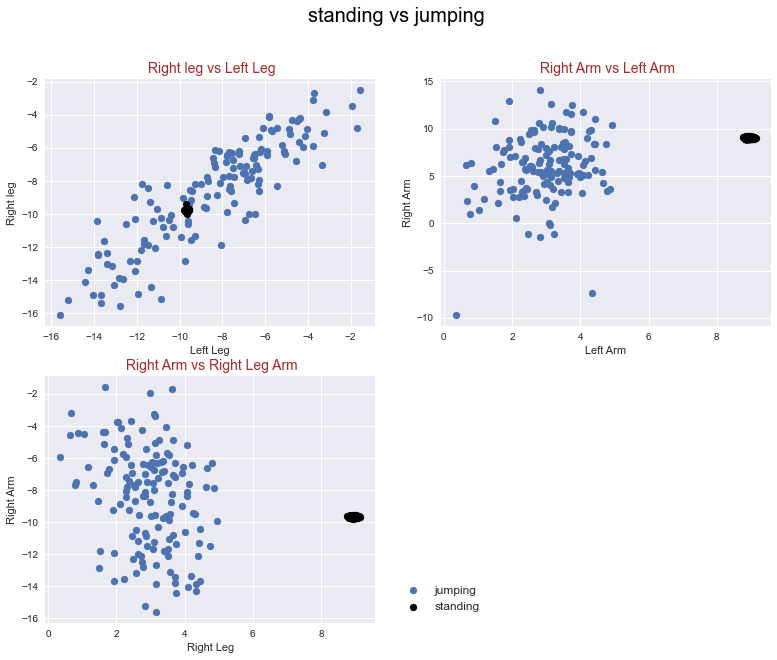

In [269]:
standingData=data1[data1["Activity"]=="standing"]
jumpingData=data1[data1["Activity"]=="jumping"]

plt.figure(figsize=(13, 10))
plt.suptitle("standing vs jumping",size=20,color="black")
plt.style.use("seaborn")
plt.subplot(221)
plt.scatter(jumpingData['RL_xacc'],jumpingData['LL_xacc'],label="jumping")
plt.scatter(standingData['RL_xacc'],standingData['LL_xacc'],color="black",label="standing")


plt.title(" Right leg vs Left Leg", size=14,color="brown")
plt.ylabel("Right leg")
plt.xlabel("Left Leg")
#plt.legend(fontsize="10")

#plt.figure(figsize=(13, 10))
#plt.suptitle("standing vs jumping",size=20,color="black")
plt.style.use("seaborn")
plt.subplot(222)
plt.scatter(jumpingData['RA_xacc'],jumpingData['LA_xacc'],label="jumping")
plt.scatter(standingData['RA_xacc'],standingData['LA_xacc'],color="black",label="standing")


plt.title(" Right Arm vs Left Arm", size=14,color="brown")
plt.ylabel("Right Arm")
plt.xlabel("Left Arm")
#plt.legend(fontsize="10")

plt.style.use("seaborn")
plt.subplot(223)
plt.scatter(jumpingData['RA_xacc'],jumpingData['RL_xacc'],label="jumping")
plt.scatter(standingData['RA_xacc'],standingData['RL_xacc'],color="black",label="standing")


plt.title(" Right Arm vs Right Leg Arm", size=14,color="brown")
plt.ylabel("Right Arm")
plt.xlabel("Right Leg")
#plt.legend(fontsize="10")
plt.legend(loc="lower right" ,bbox_to_anchor=(1.35, 0),fontsize="12")

    The acceleartion difference of the body part while jumping and standing is very evident from the scatter plot.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Ascending stairs'),
  Text(1, 0, 'Decending stairs'),
  Text(2, 0, 'cycling in horizontal position'),
  Text(3, 0, 'cycling in vertical position'),
  Text(4, 0, 'exercising on a cross trainer'),
  Text(5, 0, 'exercising on a stepper'),
  Text(6, 0, 'jumping'),
  Text(7, 0, 'moving around in an elevator'),
  Text(8, 0, 'playing basketball'),
  Text(9, 0, 'rowing'),
  Text(10, 0, 'running (8 km/hr)'),
  Text(11, 0, 'sitting'),
  Text(12, 0, 'standing'),
  Text(13, 0, 'standing in an elevator'),
  Text(14, 0, 'walking (4 km/h) in 15 deg inclined'),
  Text(15, 0, 'walking (4 km/h) in flat'),
  Text(16, 0, 'walking in a parking lot')])

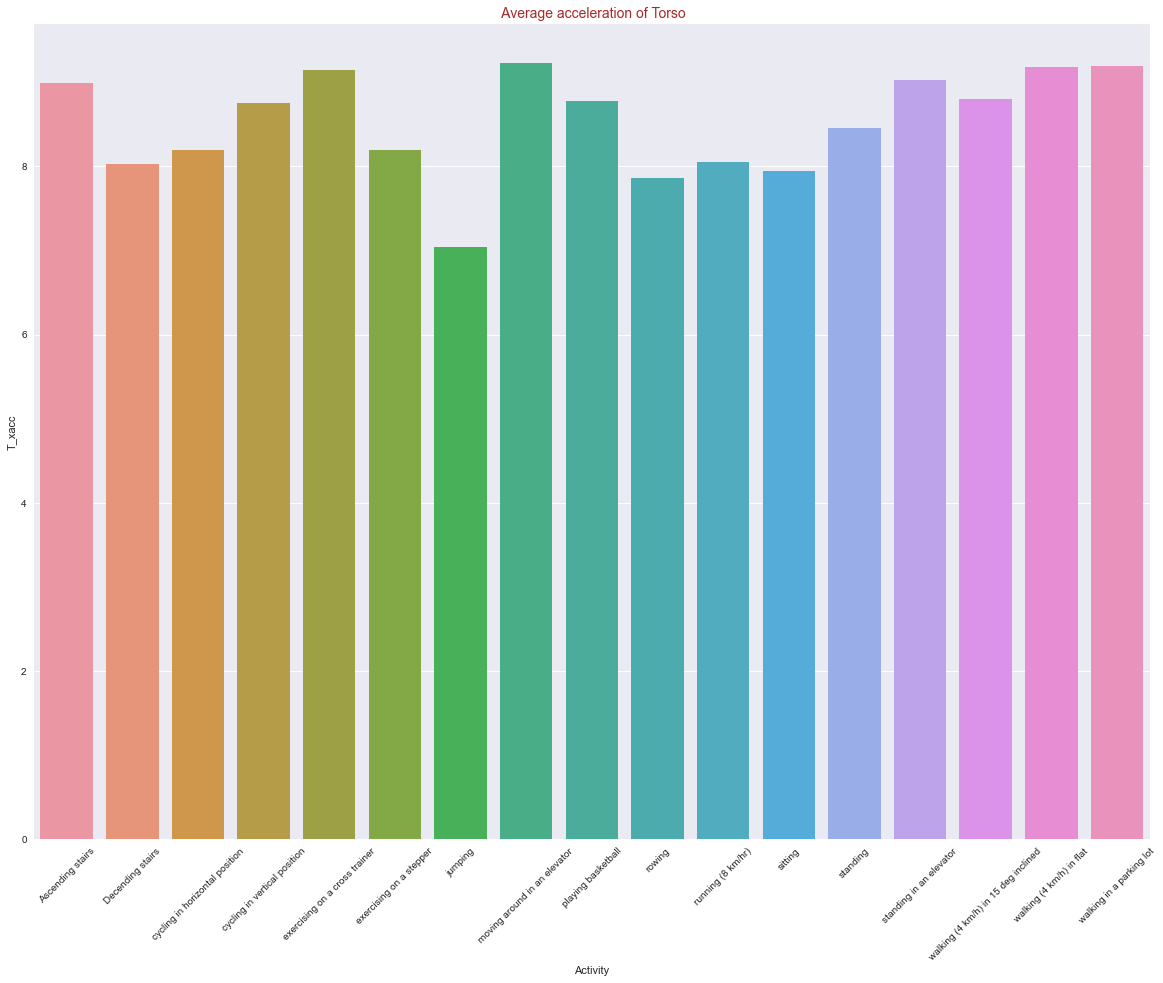

In [270]:
plt.figure(figsize=(20, 15))
df1 = data1.groupby('Activity').mean()

plt.title(" Average acceleration of Torso", size=14,color="brown")
df1
df1.reset_index(inplace=True)
sns.barplot(x='Activity', y='T_xacc', data=df1);
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Ascending stairs'),
  Text(1, 0, 'Decending stairs'),
  Text(2, 0, 'cycling in horizontal position'),
  Text(3, 0, 'cycling in vertical position'),
  Text(4, 0, 'exercising on a cross trainer'),
  Text(5, 0, 'exercising on a stepper'),
  Text(6, 0, 'jumping'),
  Text(7, 0, 'moving around in an elevator'),
  Text(8, 0, 'playing basketball'),
  Text(9, 0, 'rowing'),
  Text(10, 0, 'running (8 km/hr)'),
  Text(11, 0, 'sitting'),
  Text(12, 0, 'standing'),
  Text(13, 0, 'standing in an elevator'),
  Text(14, 0, 'walking (4 km/h) in 15 deg inclined'),
  Text(15, 0, 'walking (4 km/h) in flat'),
  Text(16, 0, 'walking in a parking lot')])

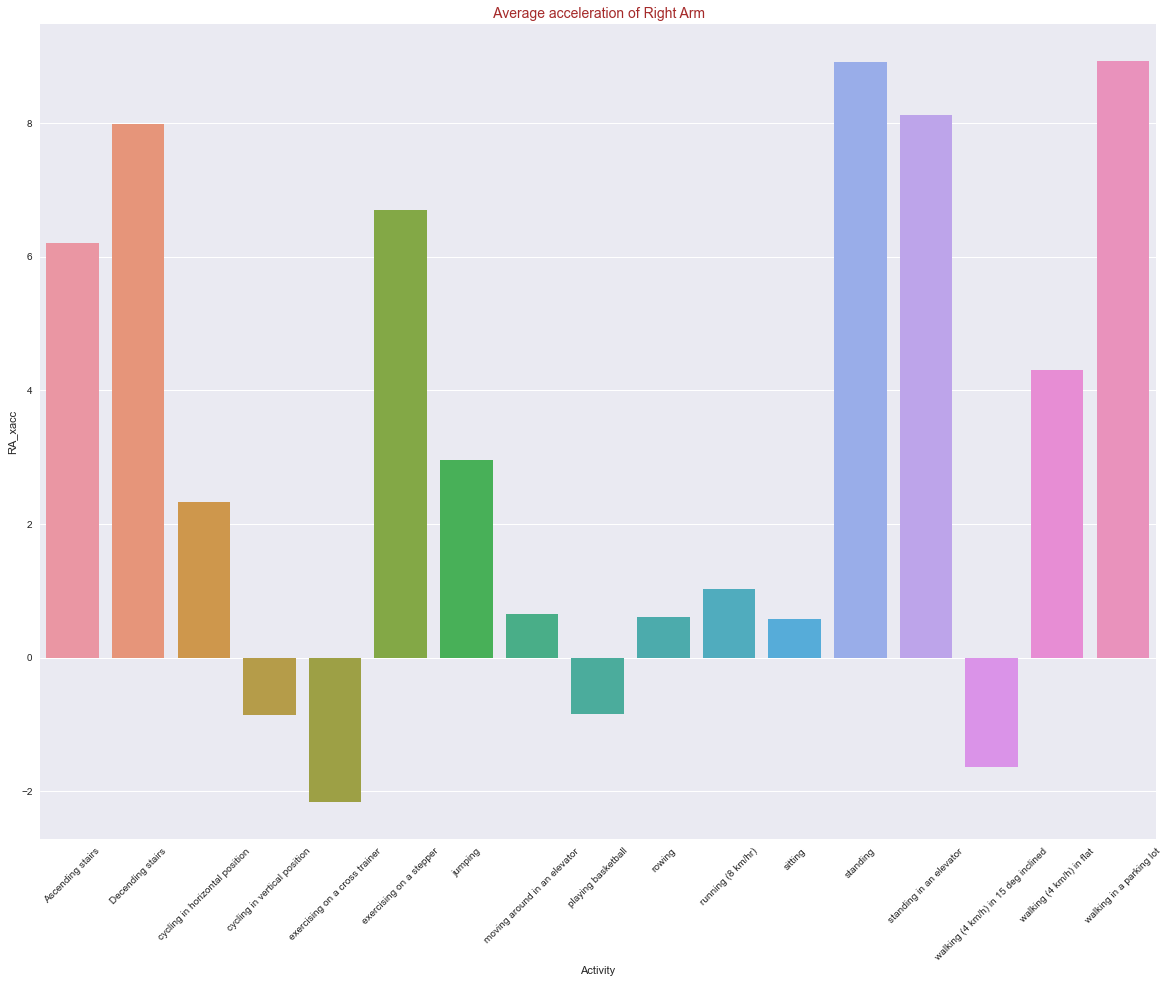

In [271]:
plt.figure(figsize=(20, 15))
df1 = data1.groupby('Activity').mean()
plt.title(" Average acceleration of Right Arm", size=14,color="brown")
df1.reset_index(inplace=True)
sns.barplot(x='Activity', y='RA_xacc', data=df1);
plt.xticks(rotation=45)

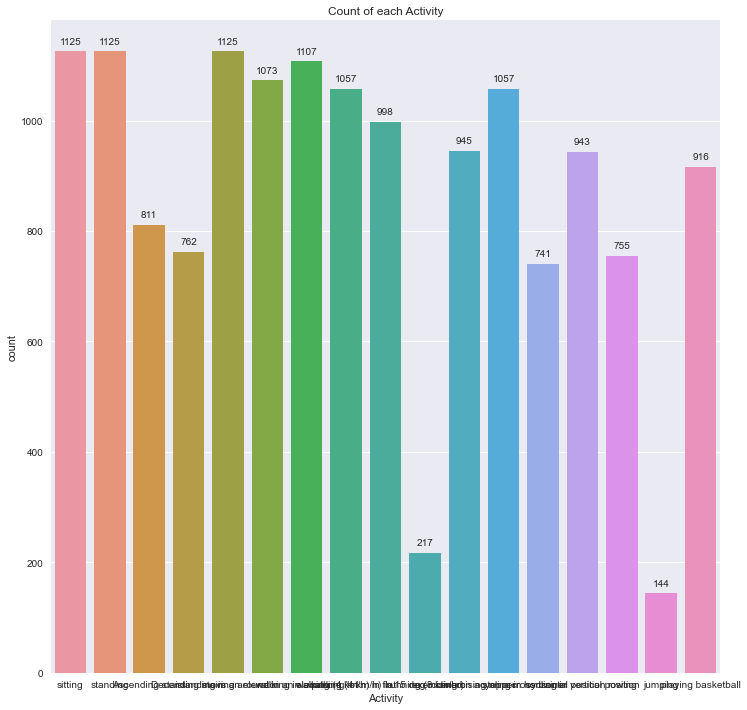

In [272]:
plt.figure(figsize=(12, 12))
ax = sns.countplot(x="Activity",data=data1)

plt.title("Count of each Activity");
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

array([[<AxesSubplot:title={'center':'T_xacc'}>,
        <AxesSubplot:title={'center':'T_yacc'}>,
        <AxesSubplot:title={'center':'T_zacc'}>,
        <AxesSubplot:title={'center':'T_xgyro'}>,
        <AxesSubplot:title={'center':'T_ygyro'}>,
        <AxesSubplot:title={'center':'T_zgyro'}>,
        <AxesSubplot:title={'center':'T_xmag'}>],
       [<AxesSubplot:title={'center':'T_ymag'}>,
        <AxesSubplot:title={'center':'T_zmag'}>,
        <AxesSubplot:title={'center':'RA_xacc'}>,
        <AxesSubplot:title={'center':'RA_yacc'}>,
        <AxesSubplot:title={'center':'RA_zacc'}>,
        <AxesSubplot:title={'center':'RA_xgyro'}>,
        <AxesSubplot:title={'center':'RA_ygyro'}>],
       [<AxesSubplot:title={'center':'RA_zgyro'}>,
        <AxesSubplot:title={'center':'RA_xmag'}>,
        <AxesSubplot:title={'center':'RA_ymag'}>,
        <AxesSubplot:title={'center':'RA_zmag'}>,
        <AxesSubplot:title={'center':'LA_xacc'}>,
        <AxesSubplot:title={'center':'LA_yacc'}>,
 

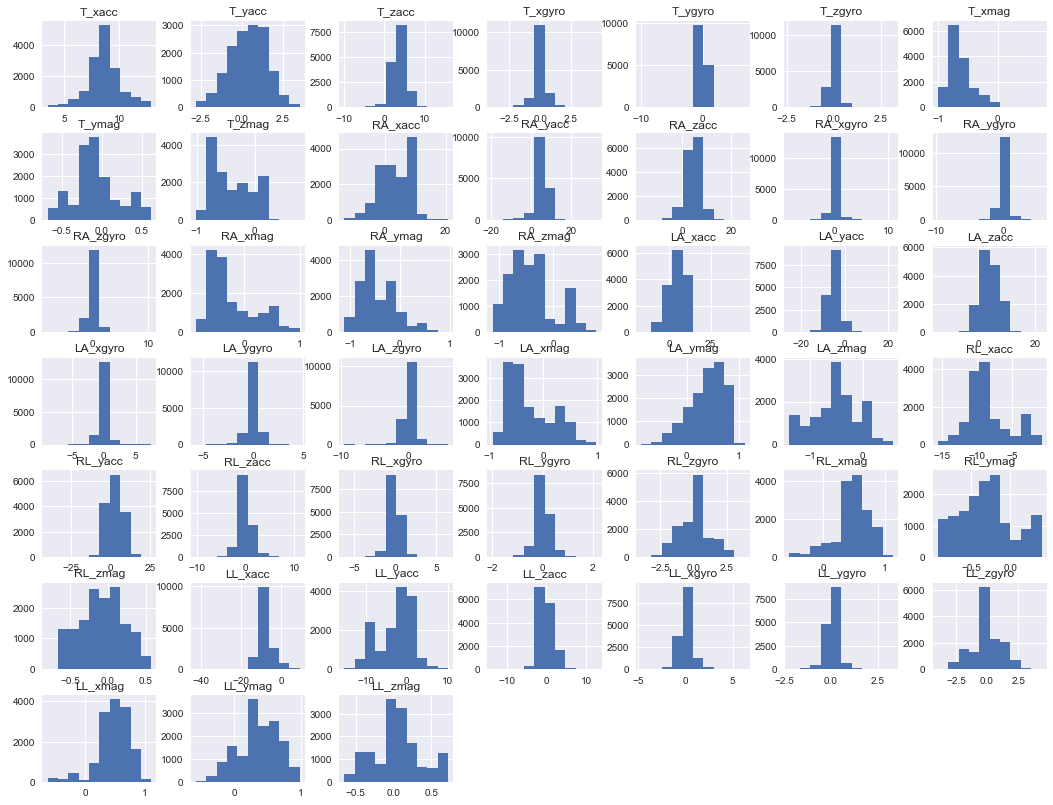

In [273]:
data1.hist(figsize=(18, 14))

    Most of the features are normally distributed

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(1, 0, 'T_xacc'),
  Text(2, 0, 'T_yacc'),
  Text(3, 0, 'T_zacc'),
  Text(4, 0, 'T_xgyro'),
  Text(5, 0, 'T_ygyro'),
  Text(6, 0, 'T_zgyro'),
  Text(7, 0, 'T_xmag'),
  Text(8, 0, 'T_ymag'),
  Text(9, 0, 'T_zmag'),
  Text(10, 0, 'RA_xacc'),
  Text(11, 0, 'RA_yacc'),
  Text(12, 0, 'RA_zacc'),
  Text(13, 0, 'RA_xgyro'),
  Text(14, 0, 'RA_ygyro'),
  Text(15, 0, 'RA_zgyro'),
  Text(16, 0, 'RA_xmag'),
  Text(17, 0, 'RA_ymag'),
  Text(18, 0, 'RA_zmag'),
  Text(19, 0, 'LA_xacc'),
  Text(20, 0, 'LA_yacc'),
  Text(21, 0, 'LA_zacc'),
  Text(22, 0, 'LA_xgyro'),
  Text(23, 0, 'LA_ygyro'),
  Text(24, 0, 'LA_zgyro'),
  Text(25, 0, 'LA_xmag'),
  Text(26, 0, 'LA_ymag'),
  Text(27, 0, 'LA_zmag'),
  Text(28, 0, 'RL_xacc'),
  Text(29, 0, 'RL_yacc'),
  Text(30, 0, 'RL_zacc'),
  Text(31, 0, 'RL_xgyro

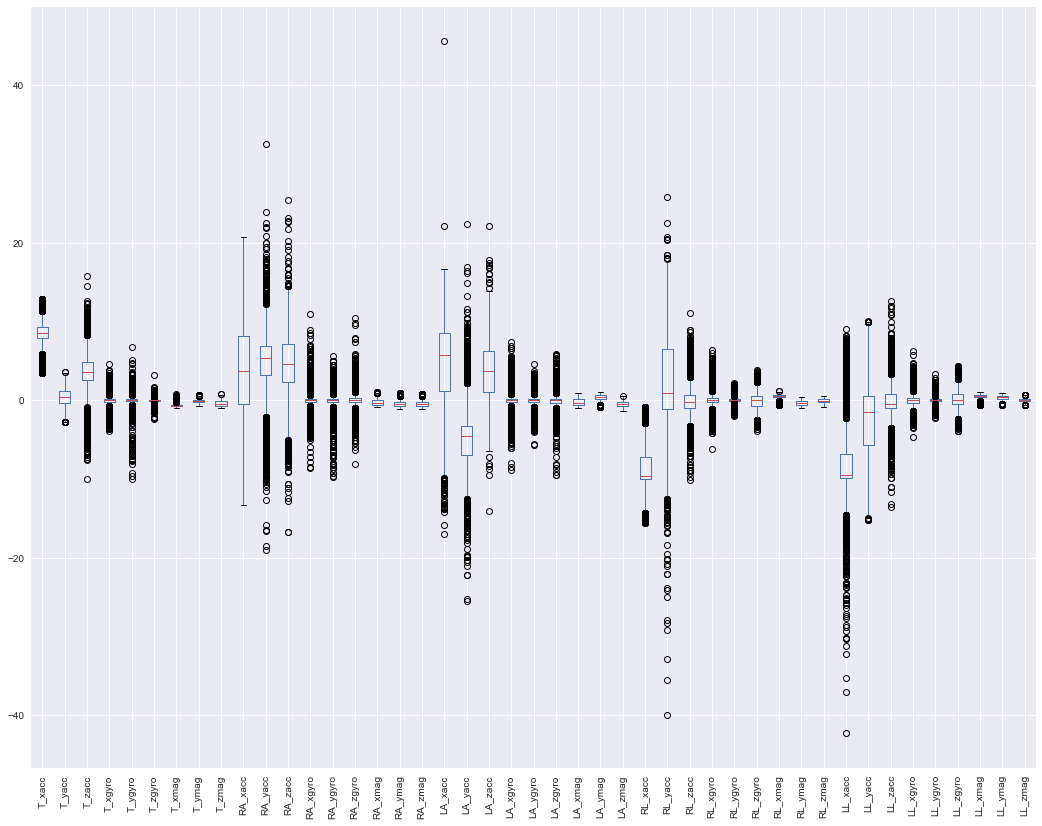

In [274]:
plt.figure(figsize=(18, 14))
data1.boxplot()
plt.xticks(rotation=90) 

## Modeling

    Building a model which can predict the activity based on the readings from sensors on each unit (x,y,z accelerometers, x,y,z gyroscopes, x,y,z magnetometers) attached to torso (T), right arm (RA), left arm (LA), right leg (RL), left leg (LL) 
    

### LogisticRegression

In [275]:

y = data["Activity"]
X = data.drop(['Activity'], axis=1)

minMaxScaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = minMaxScaler.fit_transform(X)
X = pd.DataFrame(X)
X.describe()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LogisticRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[213   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 191   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 181   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 223   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 270   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 233   0   0  11   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  34   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 258   0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   2  22   0   0 213   0   0   0   0   0   0   0   2]
 [  0   0   0   0   0   0   0   0   0 175   0   0   0   0   0   0   0]
 [  1   0   0   0   2   0   0   0   0   0  31   0   0   0  20   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 290   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 276   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 278   0   0   0]
 [  0 

/Users/bilalaliyar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNN

In [276]:
from sklearn.neighbors import KNeighborsClassifier

In [277]:
# Identifty the best values for n_neighbors

### Model fine tuning

#### Finding the best value for n_neighbors

In [278]:
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    kncdf = KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    model = kncdf.fit(X_train,y_train)
    predictions = model.predict(X_test)
    #confusion_matrix(y_test, predictions)
    acc_values.append(accuracy_score(y_test, predictions))
    
acc_values

[0.9962426194310252,
 0.9951690821256038,
 0.9935587761674718,
 0.9922168545356951,
 0.9924852388620504,
 0.9908749329039184,
 0.991411701556629,
 0.990606548577563,
 0.9908749329039184,
 0.989801395598497,
 0.989801395598497,
 0.9887278582930756]

Text(0, 0.5, 'Accuracy')

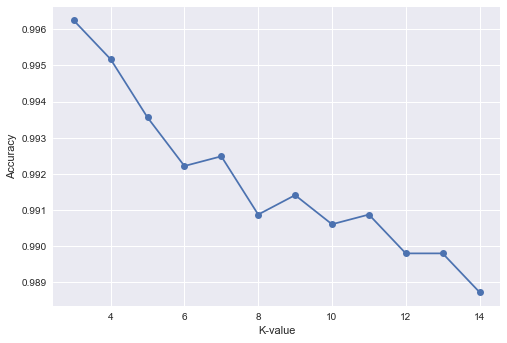

In [279]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel("K-value")
plt.ylabel("Accuracy")

In [280]:
from sklearn.model_selection import GridSearchCV

In [281]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,5))
n_neighbors = list(range(3,10))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()

### Hyperparameter tuning with GridSerach

In [282]:
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 3


In [283]:
kncdf = KNeighborsClassifier(leaf_size=1,n_neighbors=3,metric="minkowski",p=1)
model = kncdf.fit(X_train,y_train)
predictions = model.predict(X_test)
confusion_matrix(y_test, predictions)

array([[212,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1],
       [  0, 191,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0, 181,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0, 223,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0, 271,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 244,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  34,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0, 259,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   4,   0,   0, 231,   0,   0,   0,   0,
          0,   4,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 175,   0,   0,   0,
         

In [284]:
print(classification_report(y_test, predictions))

                                     precision    recall  f1-score   support

                   Ascending stairs       1.00      1.00      1.00       213
                   Decending stairs       1.00      1.00      1.00       191
     cycling in horizontal position       1.00      1.00      1.00       181
       cycling in vertical position       1.00      1.00      1.00       223
      exercising on a cross trainer       1.00      1.00      1.00       271
            exercising on a stepper       0.98      1.00      0.99       244
                            jumping       1.00      1.00      1.00        34
       moving around in an elevator       1.00      1.00      1.00       260
                 playing basketball       1.00      0.97      0.98       239
                             rowing       1.00      1.00      1.00       175
                  running (8 km/hr)       1.00      1.00      1.00        54
                            sitting       1.00      1.00      1.00       29

### SVM

In [285]:
from sklearn.svm import SVC

In [286]:
clf = SVC(kernel='linear') 
model = clf.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[213   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 191   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 181   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 223   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 271   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 240   0   0   4   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  34   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 260   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  20   0   0 219   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 175   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0  43   0   0   0  10   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 290   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 276   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 278   0   0   0]
 [  0 

In [287]:
clf = SVC(kernel='rbf') 
model = clf.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[213   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 191   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 181   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 223   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 271   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 244   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  34   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 260   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 175   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  54   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 290   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 276   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 278   0   0   0]
 [  0 

### Decision Tree

In [288]:
from sklearn.tree import DecisionTreeClassifier

In [289]:
dclf = DecisionTreeClassifier()
model = dclf.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[212   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0 191   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 181   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 223   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 270   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 238   0   0   6   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  34   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 259   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   6   0   0 231   1   0   0   0   0   0   1   0]
 [  0   0   0   0   0   0   0   0   0 175   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  53   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 290   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 276   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0 277   0   0   0]
 [  0 

### Random Forest

In [290]:
from sklearn.ensemble import RandomForestClassifier

In [291]:
nmclf=RandomForestClassifier(n_estimators=50)
model = nmclf.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[213   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 191   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 181   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 223   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 271   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 244   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  34   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 260   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 239   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 175   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  54   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 290   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 276   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 278   0   0   0]
 [  0 

####  Random Forest and SVM Classifiers are giving 100% accuracy in predicting the activity based on the sensor readings of body parts